Bias = Seberapa jauh hasil prediksi dengan hasil asli<br>
Variance = Seberapa bagus model yang kita bangun dalam menangani unseen data<br>
yang dicari adalah, low bias dan low variance<br>
Model complexity adalah fleksibilitas dari model yang kita bangun<br>
As the complexity of <b>model</b> increases, the bias term decreases while the variance term increases

# Voting Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
liver = pd.read_csv('../Data/liver.csv')
liver.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
liver['gender'] = le.fit_transform(liver['gender'])
liver.head(2)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1


In [4]:
feature = liver.drop('is_patient',1)
liver = liver['is_patient']

In [5]:
feature.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
dtype: int64

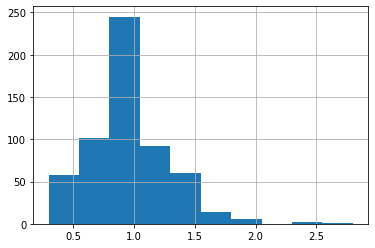

In [6]:
feature['alkphos'].hist()
plt.show()

In [7]:
feature['alkphos'] = feature['alkphos'].fillna(feature['alkphos'].mean())

In [8]:
ss = StandardScaler()
for i in feature:
    feature_values = ss.fit_transform(feature.values)
    
feature = pd.DataFrame(data=feature_values,
                       index=feature.index,
                       columns=feature.columns)
feature.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
0,1.252098,-1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898
1,1.066637,0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697
2,1.066637,0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323
3,0.819356,0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351
4,1.684839,0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(feature,liver,test_size=0.2,random_state=1111)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [11]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()

In [12]:
model = [('Logistic Regression',logreg),('Decision Tree Classifier',dtc),('K Neighbors Classifier',knn)]

In [13]:
from sklearn.metrics import accuracy_score
for model_name, mdl in model:
    mdl.fit(X_train,y_train)
    y_pred = mdl.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    print('{} Memiliki Akurasi : {}'.format(model_name, round(acc,2)))

Logistic Regression Memiliki Akurasi : 0.71
Decision Tree Classifier Memiliki Akurasi : 0.63
K Neighbors Classifier Memiliki Akurasi : 0.65


In [15]:
vc = VotingClassifier(estimators=model)
vc.fit(X_train,y_train)
y_pred = vc.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Voting Classifier Memiliki Akurasi : {}'.format(round(acc,2)))

Voting Classifier Memiliki Akurasi : 0.69


# Bagging Classifier

In [16]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

In [17]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

Test set accuracy of bc: 0.69
